# Visualizing Women in USA Degrees

## Introduction to data

[The Department of Education Statistics](http://nces.ed.gov/programs/digest/2013menu_tables.asp) releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. You can download the dataset Randal compiled [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv).

### Goal

Explore how we can communicate the nuanced narrative of gender gap using effective data visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
women_degrees = pd.read_csv('../data/percent-bachelors-degrees-women-usa.csv')
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


# a line chart that visualizes the historical percentage of Biology degrees awarded to women

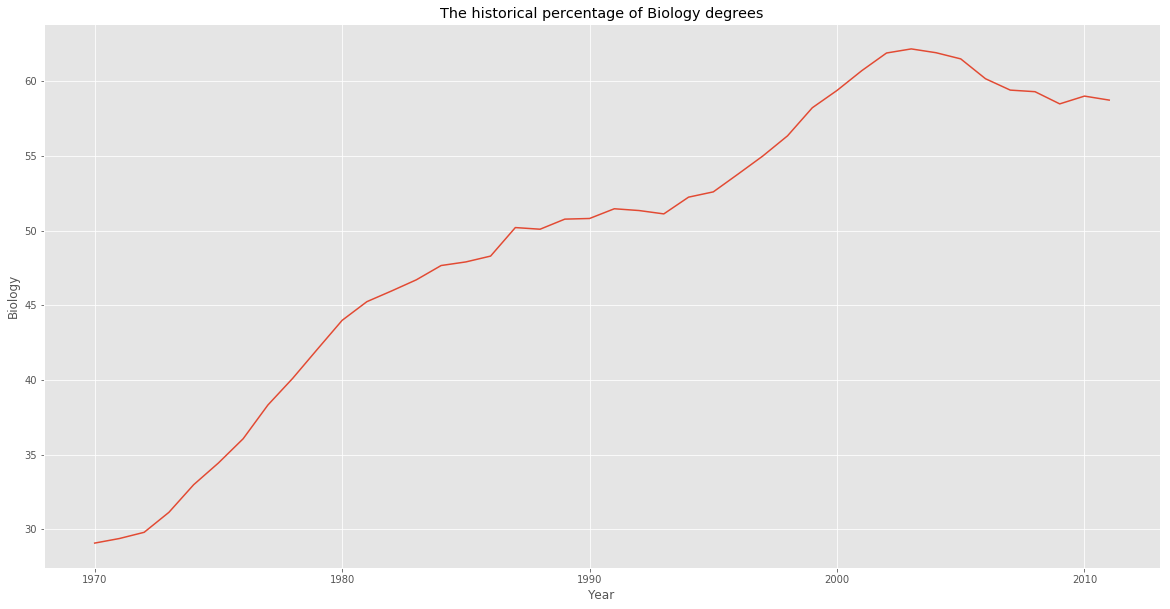

In [3]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(women_degrees.Year, women_degrees.Biology)
ax.set_title('The historical percentage of Biology degrees')
ax.set_ylabel('Biology')
ax.set_xlabel('Year')
plt.show()

## Observation 

From the plot, we can tell that Biology degrees increased steadily from 1970 and peaked in the early 2000's. We can also tell that the percentage has stayed above 50% since around 1987.

## Visualizing the gender gap

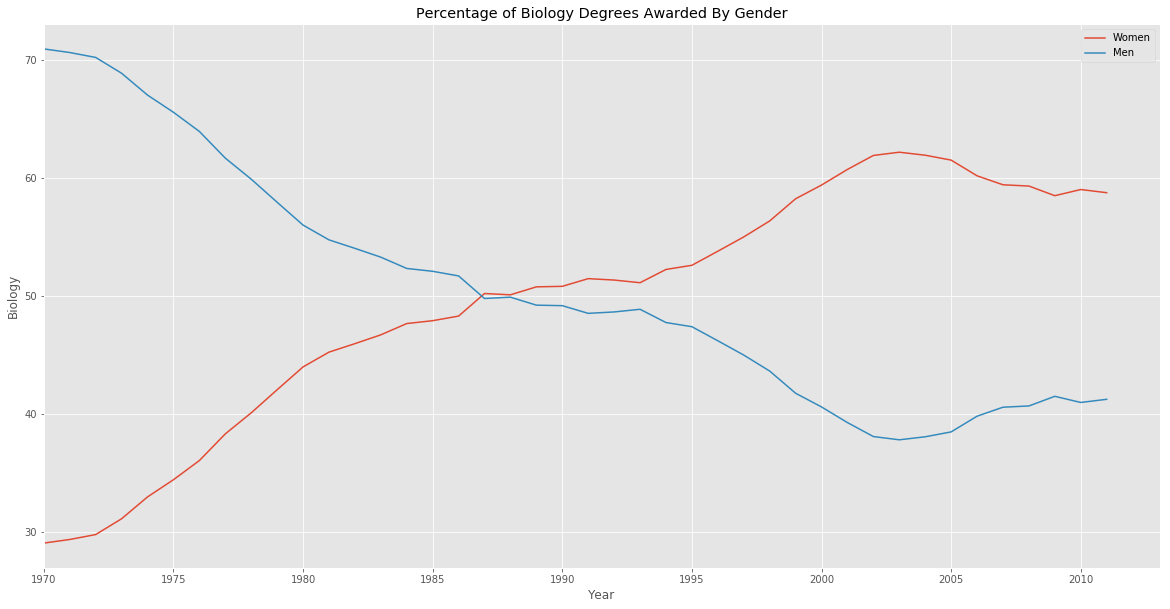

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(women_degrees.Year, women_degrees.Biology, label='Women')
ax.plot(women_degrees.Year, 100-women_degrees.Biology, label='Men')
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
ax.set_ylabel('Biology')
ax.set_xlabel('Year')
ax.set_xlim(left=1970)
ax.legend()
plt.show()

In the first period, from 1970 to around 1987, women were a minority when it came to majoring in Biology while in the second period, from around 1987 to around 2012, women became a majority

# Data-ink ration

To improve the data-ink ratio, let's make the following changes to the plot already created.

1. Remove all of the axis tick marks.
2. Hide the spines, which are the lines that connects the tick marks, on each axis.

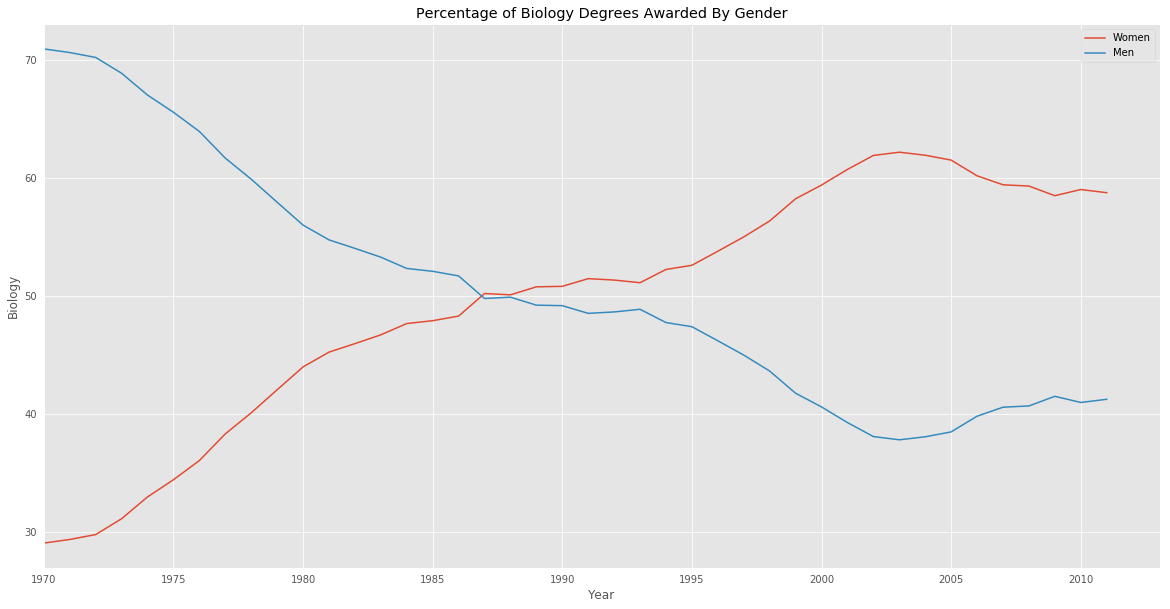

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(women_degrees.Year, women_degrees.Biology, label='Women')
ax.plot(women_degrees.Year, 100-women_degrees.Biology, label='Men')
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
ax.set_ylabel('Biology')
ax.set_xlabel('Year')
ax.set_xlim(left=1970)
ax.tick_params(top=False, bottom=False, left=False, right=False)
ax.legend(loc='upper right')
plt.show()

# Hiding spines

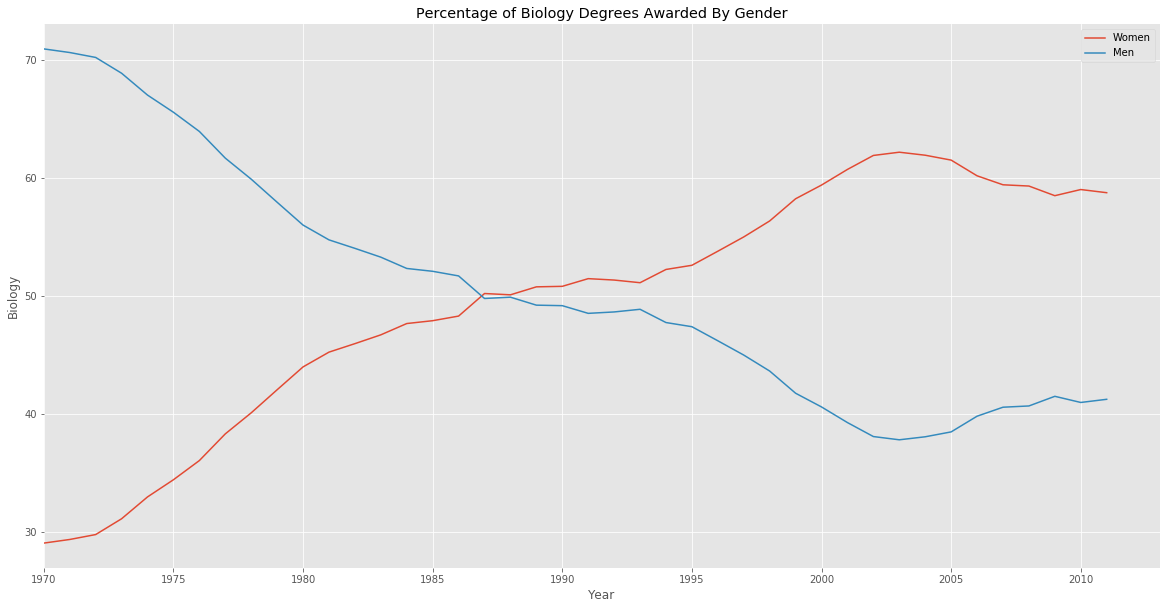

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(women_degrees.Year, women_degrees.Biology, label='Women')
ax.plot(women_degrees.Year, 100-women_degrees.Biology, label='Men')
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
ax.set_ylabel('Biology')
ax.set_xlabel('Year')
ax.set_xlim(left=1970)
for position in ['top', 'bottom', 'right', 'left']:
    ax.spines[position].set_visible(False)
ax.legend()
plt.show()

# Comparing gender gap across degree categories

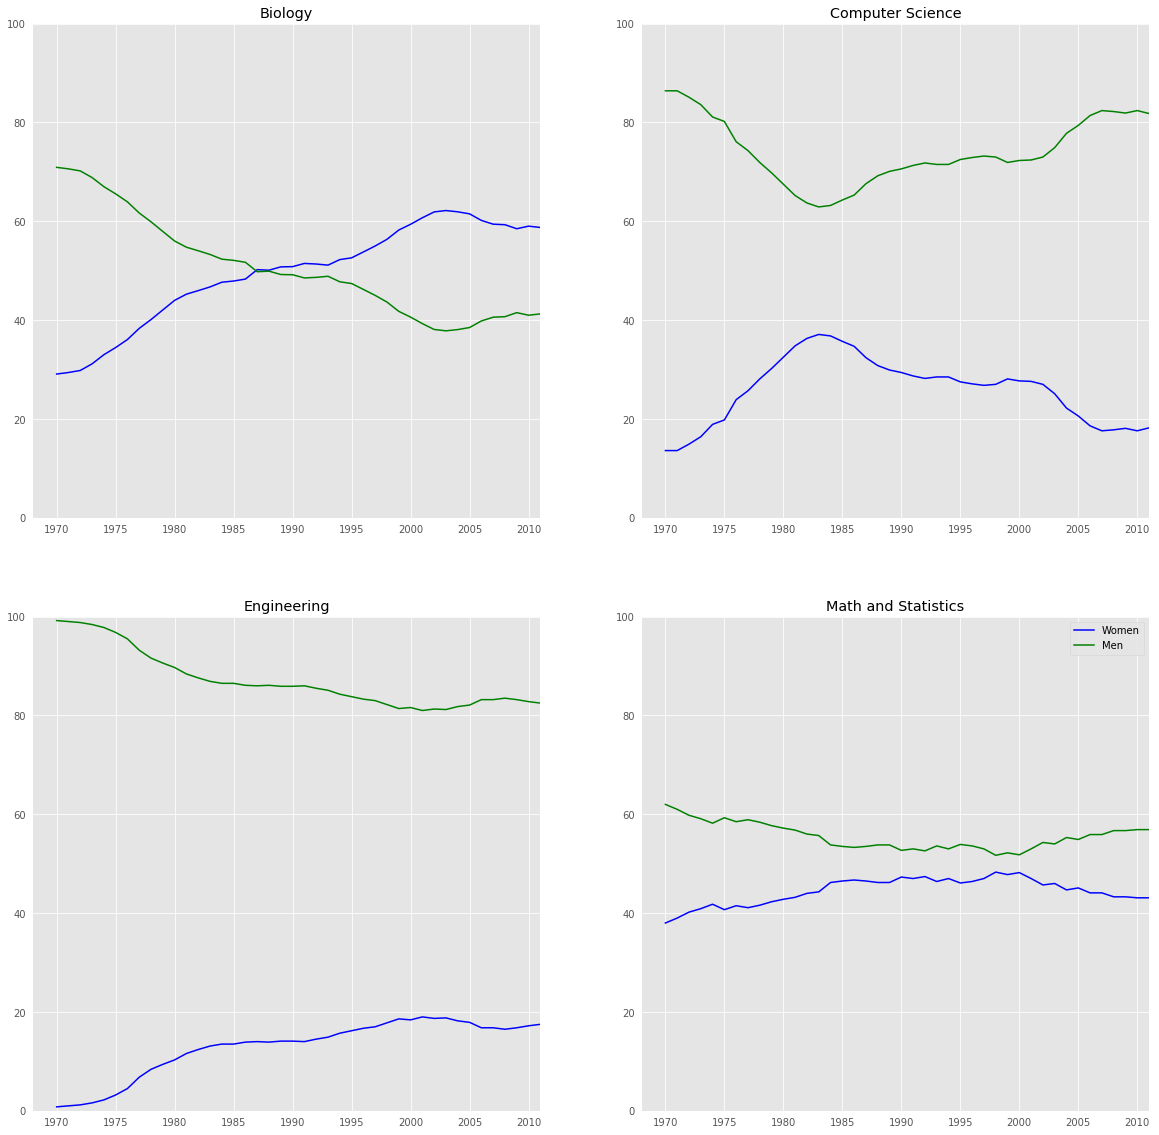

In [14]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(20, 20))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    # Add your code here.
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    for position in ['top', 'bottom', 'left', 'right']:
        ax.spines[position].set_visible(False)
    ax.tick_params(top=False, bottom=False, left=False, right=False)
    ax.set_title(major_cats[sp])
# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()

## Observation 

we can conclude that the gender gap in Computer Science and Engineering have big gender gaps while the gap in Biology and Math and Statistics is quite small. In addition, the first two degree categories are dominated by men while the latter degree categories are much more balanced.